In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv('train_extended.csv')
data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


# Data Preprocessing 1

In [3]:
data.nunique()

id                200000
Sex                    4
Length               155
Diameter             134
Height                64
Weight              3624
Shucked Weight      1995
Viscera Weight      1036
Shell Weight        1113
Age                   28
dtype: int64

In [4]:
# Drop id because we dont need it
data = data.drop('id', axis=1)
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


In [5]:
# Merge '0.025' to he "I" value in sex column
data.Sex.unique()

array(['M', 'I', 'F', '0.025'], dtype=object)

In [6]:
data['Sex'] = data['Sex'].map({'0.025' : 'I', 'M':'M', 'F':'F', "I":"I"})
data.Sex.unique()

array(['M', 'I', 'F'], dtype=object)

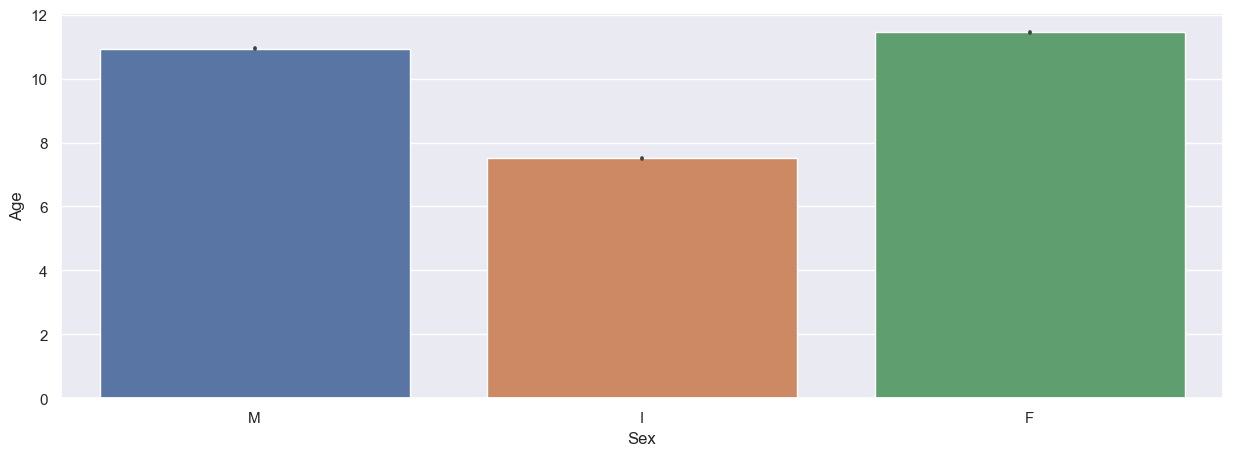

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(data, x='Sex', y='Age')
plt.show()

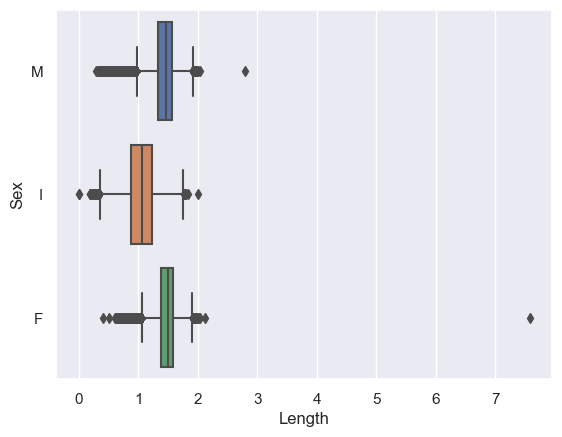

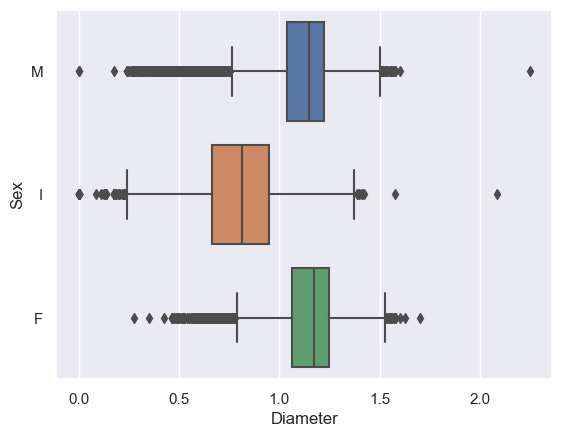

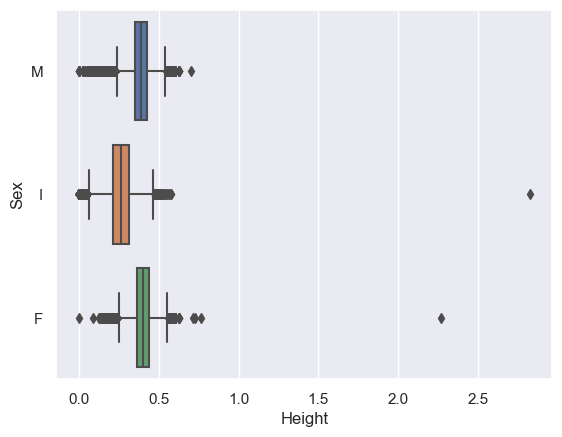

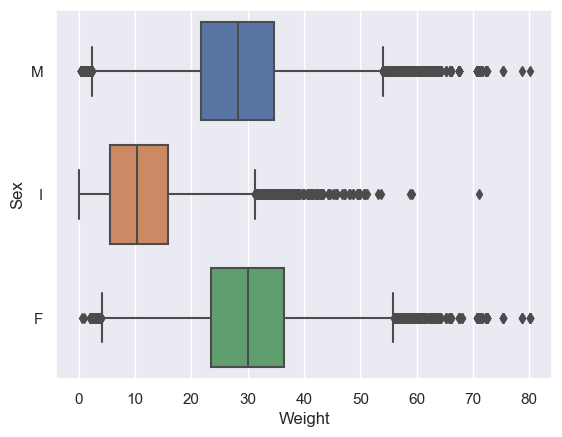

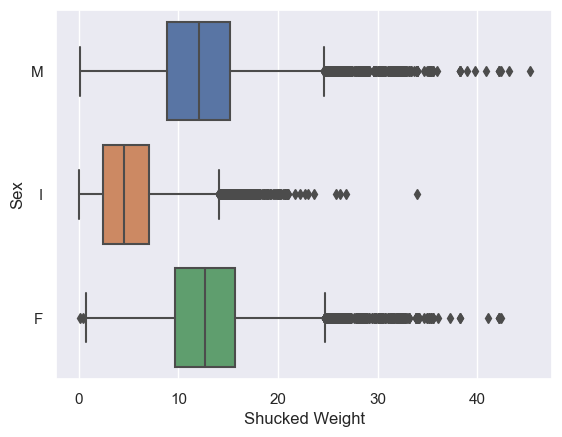

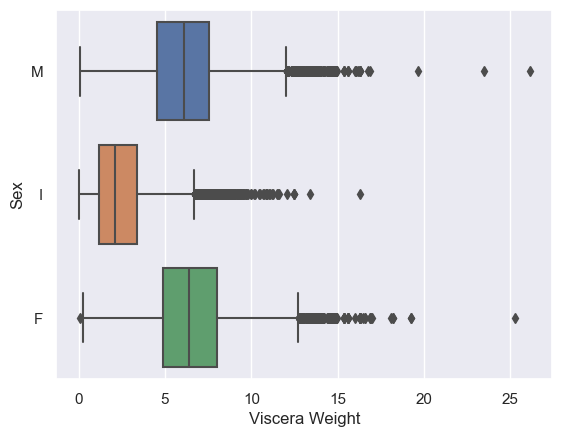

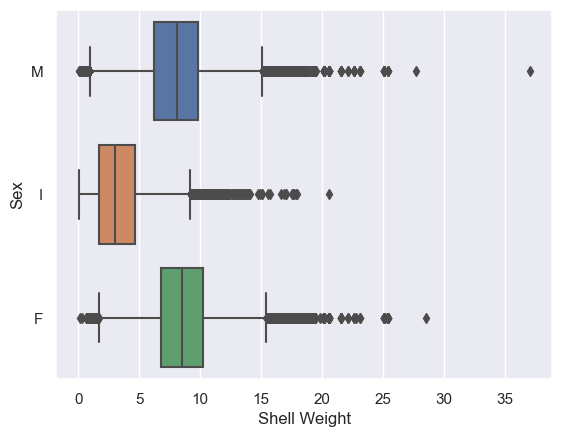

In [8]:
selected_columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']

for i in selected_columns:
    sns.boxplot(x = data[i], y=data['Sex'])
    plt.xlabel(i)
    plt.show()

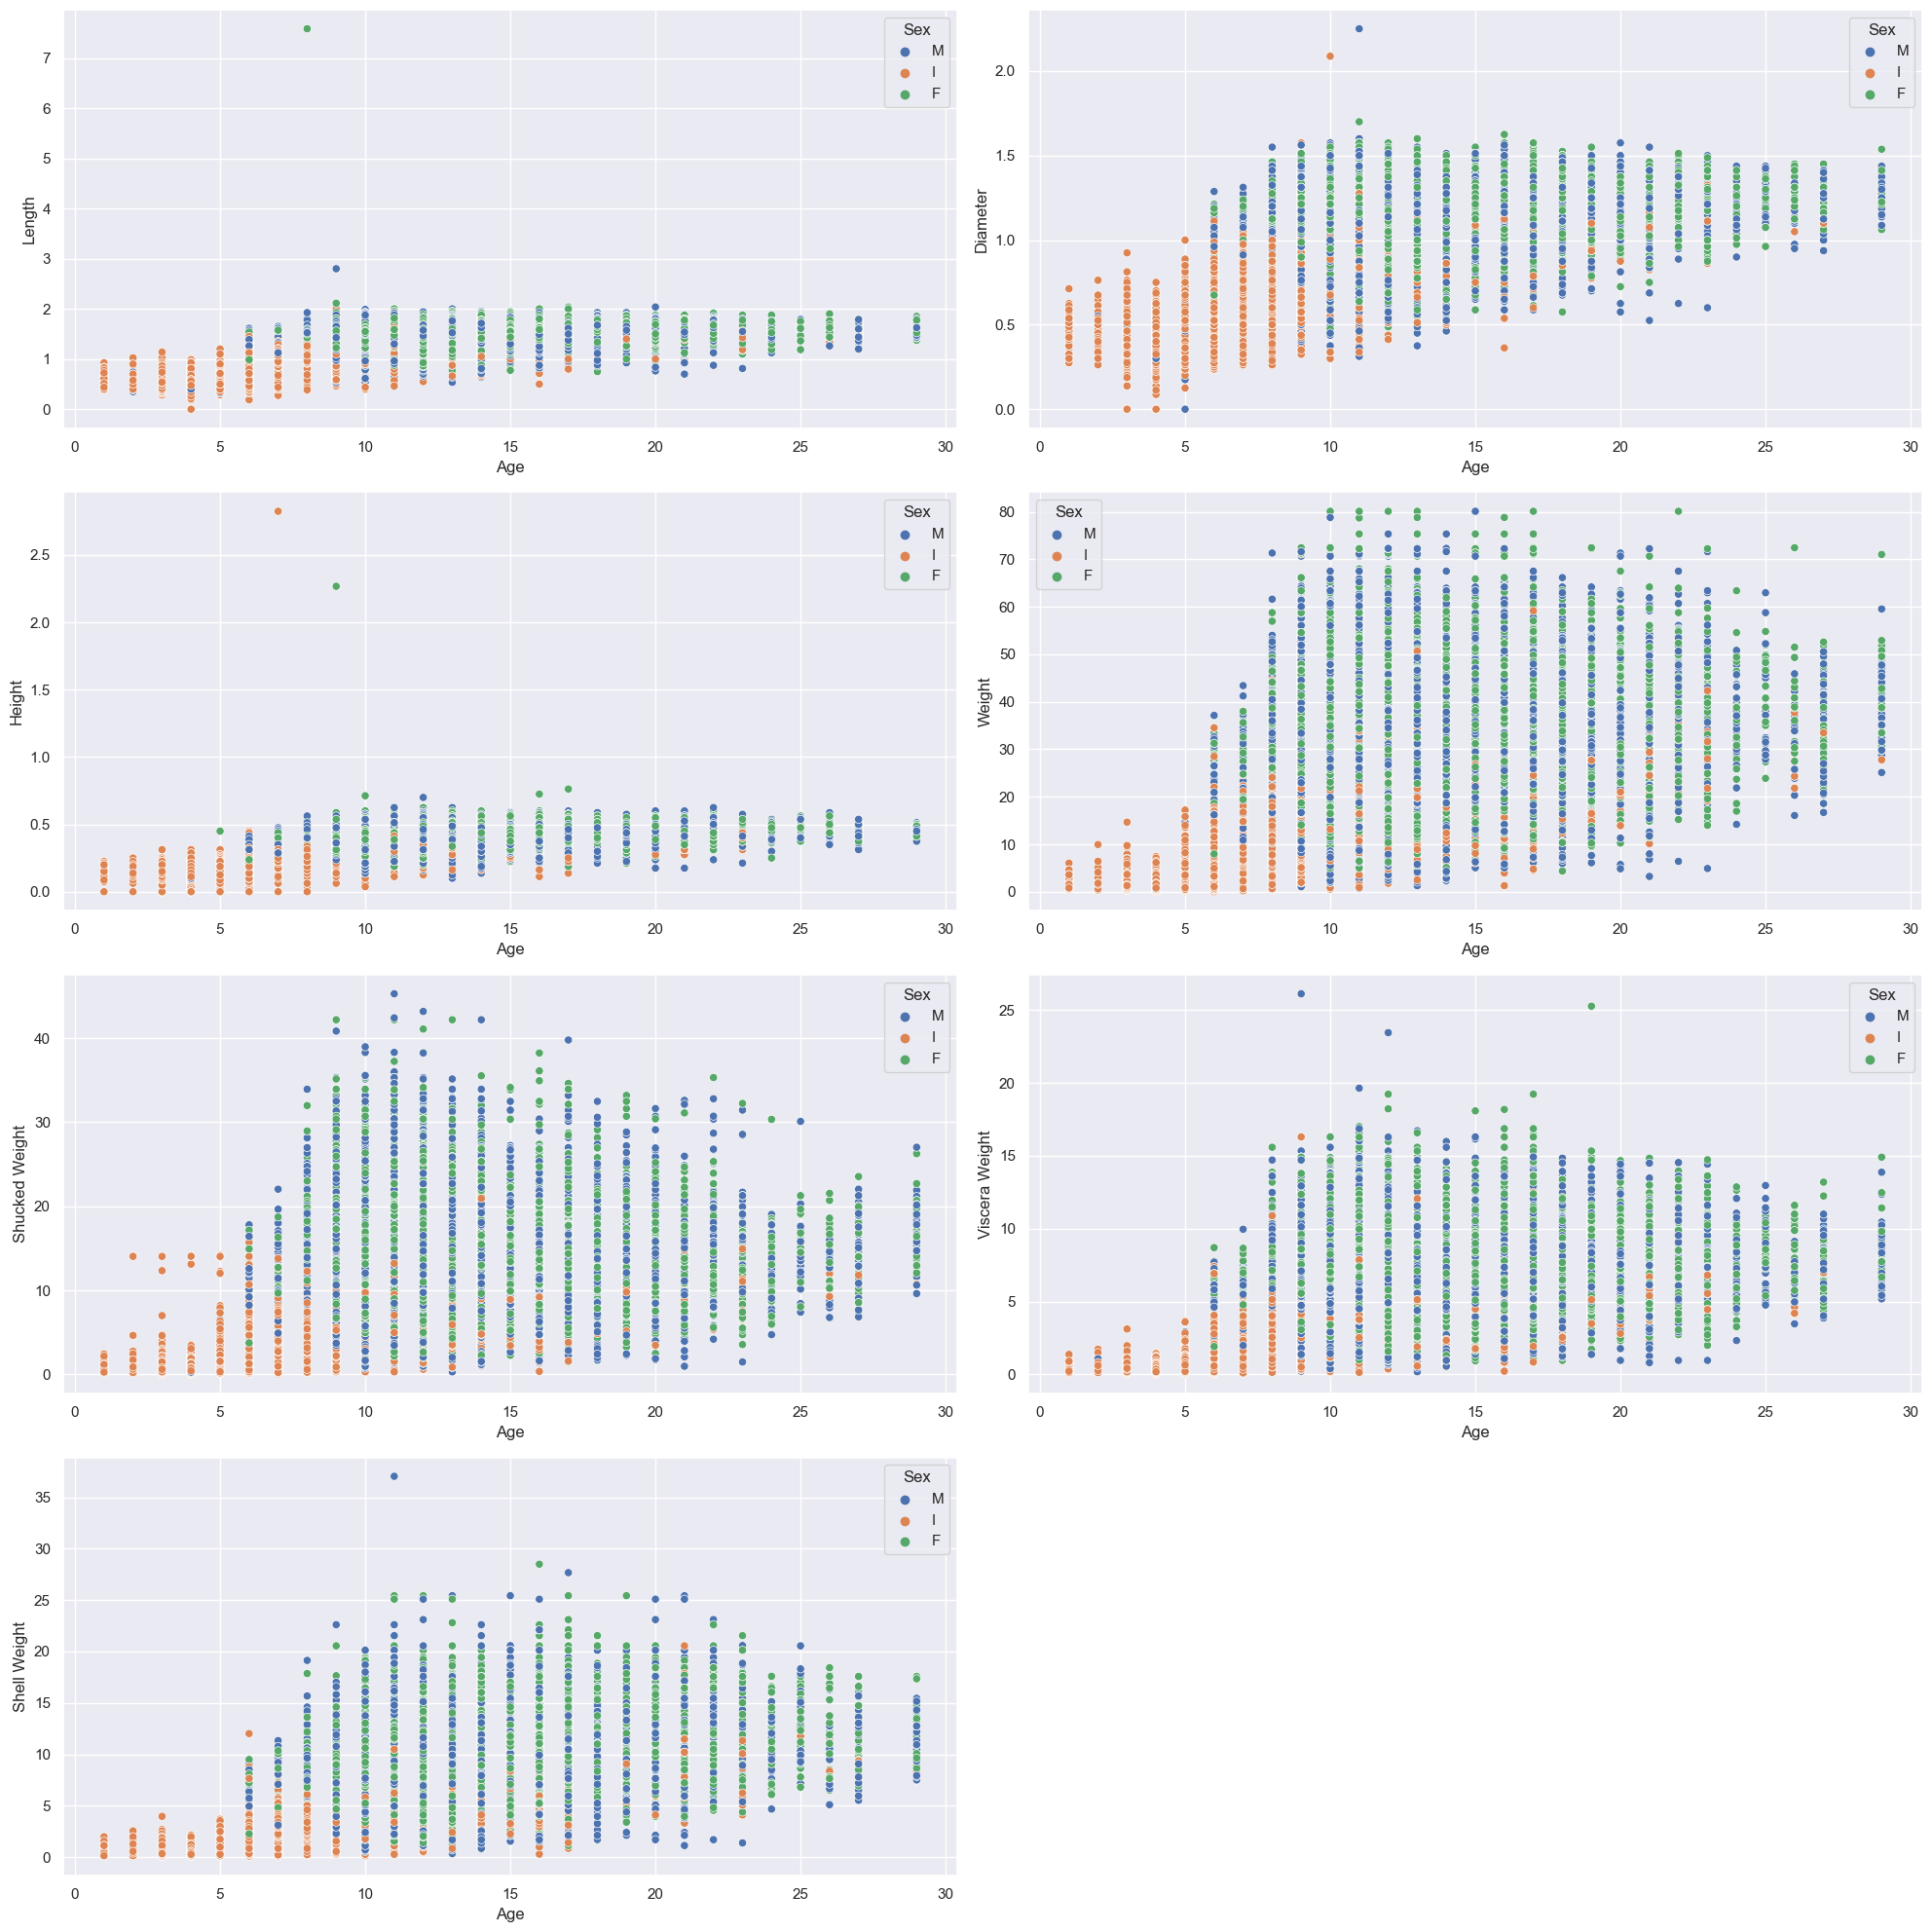

In [9]:
scatter_columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
                   'Viscera Weight', 'Shell Weight']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(scatter_columns):
    sns.scatterplot(data=data, x='Age', hue='Sex', y=var, ax=axs[i])

fig.delaxes(axs[7])
fig.tight_layout()
plt.show()


C:\Users\Ridho\AppData\Local\Temp\ipykernel_5148\4243090262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), fmt='.2g', annot=True)


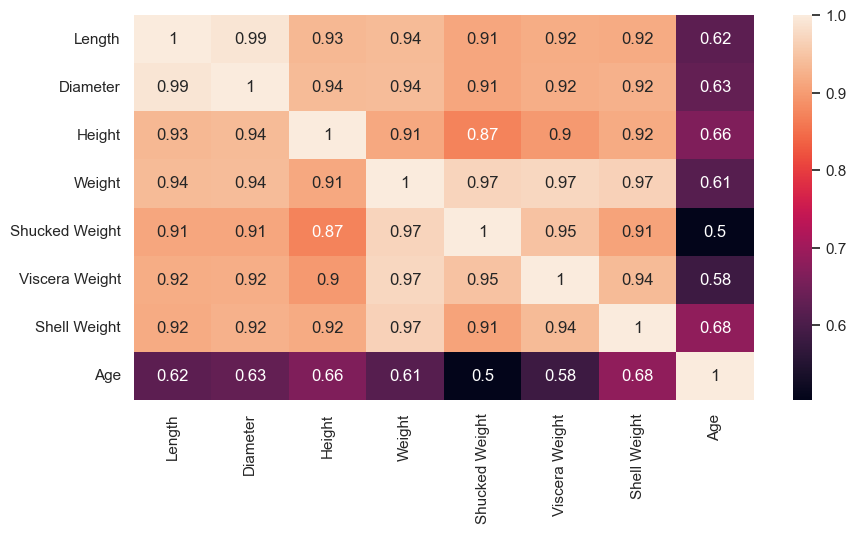

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), fmt='.2g', annot=True)
plt.show()

# Data Preprocessing 2

In [11]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [12]:
# Encode Feature Sex
data['Sex'] = data['Sex'].map({'M':0, 'F':1, 'I':2})
data.Sex.unique()

array([0, 2, 1], dtype=int64)

# Train Test Split

In [13]:
x = data.drop('Age', axis=1)
y = data['Age']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Remove Outliers

In [15]:
x_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [16]:
from scipy import stats

selected_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

threshold = 3

outlier_indices = np.where(z_scores > threshold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()

param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4}


In [18]:
dtree = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=8)
dtree.fit(x_train, y_train)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=8)

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = dtree.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('mae is {}'.format(mae))
print('mape is {}'.format(mape))
print('mse is {}'.format(mse))
print('r2 score is {}'.format(r2 * 100))
print('rmse score is {}'.format(rmse))




mae is 1.3852051692677476
mape is 0.13492656544322607
mse is 4.0719345013501105
r2 score is 60.33384370617733
rmse score is 2.017903491584796


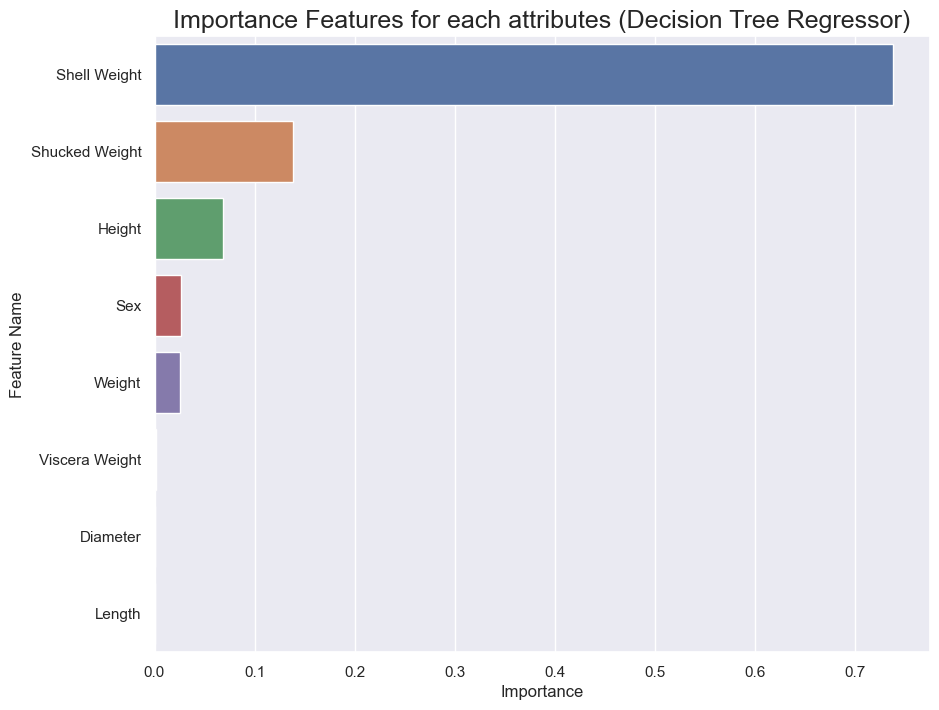

In [20]:
imf_df = pd.DataFrame({
    "Feature Name" : x_train.columns,
    "Importance" : dtree.feature_importances_
})

fi = imf_df.sort_values(by='Importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title("Importance Features for each attributes (Decision Tree Regressor)", fontsize = 18)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()



In [25]:
# from xgboost import XGBRegressor

# xgr = XGBRegressor()

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting rounds
#     'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage
#     'max_depth': [3, 5, 7],  # Maximum depth of each tree
#     'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
#     'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
#     'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term on weights
# }


# grid_search = GridSearchCV(xgr, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [28]:
from sklearn.linear_model import Ridge

param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Koefisien regularisasi
    'fit_intercept': [True, False],  # Apakah akan memperhitungkan intercept
    'copy_X': [True, False],  # Apakah akan menyalin data input
    'max_iter': [None, 1000, 5000],  # Jumlah iterasi maksimum
    'tol': [0.001, 0.0001, 0.00001],  # Toleransi penghentian iterasi
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Metode penyelesaian
}

model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

KeyboardInterrupt: 

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Inisialisasi model Regresi Ridge
ridge_model = Ridge(alpha=1.0)  # Anda dapat menyesuaikan nilai alpha sesuai kebutuhan

# Latih model menggunakan subset pelatihan
ridge_model.fit(x_train, y_train)

# Lakukan prediksi pada subset pengujian
y_pred = ridge_model.predict(x_test)

# Evaluasi model menggunakan mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4.2822656517209285
